# Pythonの数学ライブラリーを使って積分を実施する

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

SciPyのintegrateを用いて台形則とシンプソン則を用いた積分を行う。電荷密度などの積分を行うときに用いる。ここでは台形則```trapz```とシンプソン則```simps```を使ってみて誤差の見積もりまで行う。チュートリアルではシンプソン則を用いる。ここでは、例として
\begin{equation}
\int_0^1\frac{4}{1+x^2}\mathrm{d}x = \pi
\end{equation}
を考える。

## 積分を実行する

In [ ]:
x = np.linspace(0.0,1.0,5) # [0,1]を5等分してリストxに格納する。
y = 4.0/(1.0 + x**2) # 非積分関数の値をリストyに格納する。

y1_int = integrate.trapz(y, x) # 台形則による積分結果を格納
y2_int = integrate.simps(y, x) #　シンプソン則による積分結果を格納

# 結果を出力
print(f' Exact value (pi): {np.pi:22.16f}   Absolute error')
print(f' Trapezoid method: {y1_int:22.16f}     {abs(np.pi - y1_int):10.8f}') 
print(f' Simpons method:   {y2_int:22.16f}     {abs(np.pi - y2_int):10.8f}')

 Exact value (pi):     3.1415926535897931   Absolute error
 Trapezoid method:     3.1311764705882359     0.01041618
 Simpons method:       3.1415686274509804     0.00002403


## 誤差を評価する

台計測、シンプソン則の積分誤差は刻み幅を$h$とすると、それぞれ、$O(h^2)$と$O(h^4)$である。刻み幅$h$はグリッド数$N$に逆比例するので、グリッド数$N$でオーダーを見ると、それぞれ、$O(N^{-2})$と$O(N^{-4})$となる。このように誤差が刻み幅の冪乗で振る舞う場合は、誤差を両対数でプロットすると分かりやすい。つまり、$y\sim N^{n}$の時は、両辺の対数を取って$\log y\sim n\log N$のグラフを描き、その傾きが$n$となる様子を見れば良い。

In [53]:
err_y1 = [] # 誤差を入れるリストを用意
err_y2 = []
err_y11 = []
err_y22 = []
ngrid = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048 ] # グリッド数を４〜２０４８で用意する。
for i in ngrid:
    x = np.linspace(0.0, 1.0, i+1) # グリッド数の応じてx軸の刻みを変える。刻み数は奇数にする。（区間は偶数）
    y = 4.0/(1.0+x**2) # 非積分関数値をを格納
    y1_int = integrate.trapz(y, x) # 台形則で積分値を計算
    y2_int = integrate.simps(y, x) # シンプソン則で積分値を計算
    err_y1.append(abs(np.pi - y1_int) / np.pi) # 厳密な値からの差を格納
    err_y2.append(abs(np.pi - y2_int) / np.pi)
    err_y11.append(1/i**2)
    err_y22.append(1/i**6)

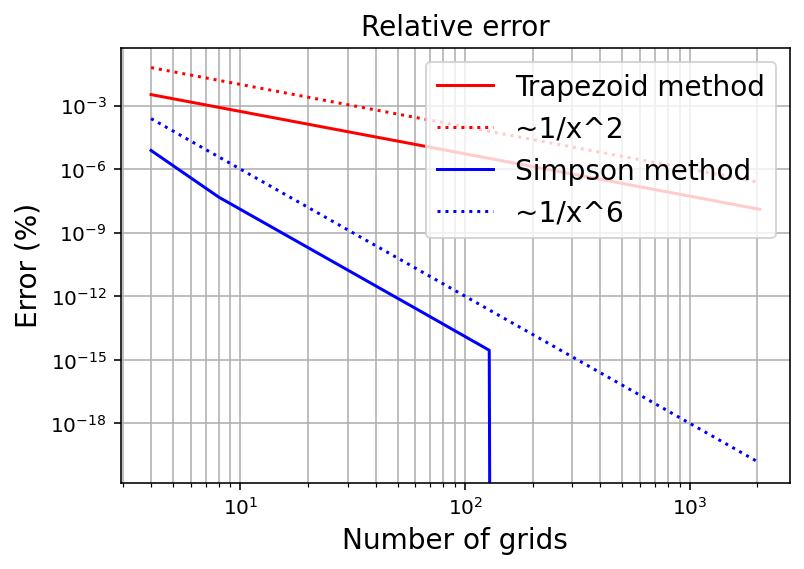

In [54]:
# Figure、Axesインスタンスを生成
fig = plt.figure()
ax = fig.add_subplot(111)

fontsize = 14
ax.set_xscale('log') # x軸のスケールをlogとする。
ax.set_yscale('log') # y軸のスケールをlogとする。
ax.plot(ngrid, err_y1, linestyle='solid', color='red', label='Trapezoid method') # 台形則のエラーをプロット
ax.plot(ngrid, err_y11, linestyle='dotted', color='red', label='~1/x^2') # 台形則のエラーをプロット
ax.plot(ngrid, err_y2, linestyle='solid', color='blue', label='Simpson method') # シンプソン則のエラーをプロット
ax.plot(ngrid, err_y22, linestyle='dotted', color='blue', label='~1/x^6') # シンプソン則のエラーをプロット
# 細々と設定
ax.set_title('Relative error', fontsize=fontsize)
ax.set_xlabel('Number of grids', fontsize=fontsize)
ax.set_ylabel('Error (%)', fontsize=fontsize)
ax.grid(which="both")
ax.legend(loc='upper right', fontsize=fontsize)
plt.show()

台形則は理論通り、$N^{-2}$のように振る舞っているが、シンプソン則の方は$N^{-4}$よりも高精度の$N^{-6}$で振る舞っているように見える。